In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.set_loglevel("info")

In [4]:
# Input files
df_file = "evaluation/results_BP/evaluation_all.tsv"
out_folder = "evaluation/results_BP/"

# Set to None if you don't want to use it. Results will not be grouped/filtered by team
names_file = {
  'filename': ['naive.tsv', 'diamondblast.tsv', 'deepgose.tsv', 'sprof.tsv', 'transfew.tsv', 'Structure.tsv', 'Sequence.tsv', 'Interpro.tsv', 'Text.tsv', 'Combined.tsv'],
  'group': ['naive', 'diamondblast', 'deepgose', 'sprof', 'transfew', 'structure', 'sequence', 'interpro', 'text', 'combined'],
  'label': ['Naive', 'DiamondBlast', 'DeepGO-SE', 'SPROF-GO', 'Transfew', 'Structure', 'Sequence', 'Interpro', 'Text', 'Combined'],
}

# Cumulate the last column of the cols variable, e.g. "pr" --> precision, so that the curves are monotonic as in CAFA
cumulate = True

# Add extreme points to the precision-recall curves (0, 1) and (1, 0)
add_extreme_points = False

# Methods with coverage below this threshold will not be plotted
coverage_threshold = 0.3

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('f_w', ['rc_w', 'pr_w'])
# metric, cols =  ('f_micro', ['rc_micro', 'pr_micro'])
# metric, cols =  ('f_micro_w', ['rc_micro_w', 'pr_micro_w'])
# metric, cols = ('s_w', ['ru_w', 'mi_w'])

In [5]:
# Map column names to full names (for axis labels)
axis_title_dict = {'pr': 'Precision', 'rc': 'Recall', 'f': 'F-score', 'pr_w': 'Weighted Precision', 'rc_w': 'Weighted Recall', 'f_w': 'Weighted F-score', 'mi': 'Misinformation (Unweighted)', 'ru': 'Remaining Uncertainty (Unweighted)', 'mi_w': 'Misinformation', 'ru_w': 'Remaining Uncertainty', 's': 'S-score', 'pr_micro': 'Precision (Micro)', 'rc_micro': 'Recall (Micro)', 'f_micro': 'F-score (Micro)', 'pr_micro_w': 'Weighted Precision (Micro)', 'rc_micro_w': 'Weighted Recall (Micro)', 'f_micro_w': 'Weighted F-score (Micro)'}

# Map ontology namespaces to full names (for plot titles)
# ontology_dict = {'biological_process': 'BPO', 'molecular_function': 'MFO', 'cellular_component': 'CCO'}
ontology_dict = {'biological_process': 'Biological Process', 'molecular_function': 'Molecular Function', 'cellular_component': 'Cellular Component'}

In [6]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,n,tp,fp,fn,pr,rc,cov,...,pr_w,rc_w,cov_w,mi_w,ru_w,f_w,s_w,pr_micro_w,rc_micro_w,f_micro_w
0,deepgose.tsv,biological_process,0.001,2585.0,11.7077,63.1245,8.3573,0.1834,0.6132,0.9996,...,0.1623,0.5209,0.9996,69.8921,11.7390,0.2474,70.8710,0.1326,0.4764,0.2074
1,deepgose.tsv,biological_process,0.002,2585.0,11.7077,63.1245,8.3573,0.1834,0.6132,0.9996,...,0.1623,0.5209,0.9996,69.8921,11.7390,0.2474,70.8710,0.1326,0.4764,0.2074
2,deepgose.tsv,biological_process,0.003,2585.0,11.7077,63.1245,8.3573,0.1834,0.6132,0.9996,...,0.1623,0.5209,0.9996,69.8921,11.7390,0.2474,70.8710,0.1326,0.4764,0.2074
3,deepgose.tsv,biological_process,0.004,2585.0,11.7077,63.1245,8.3573,0.1834,0.6132,0.9996,...,0.1623,0.5209,0.9996,69.8921,11.7390,0.2474,70.8710,0.1326,0.4764,0.2074
4,deepgose.tsv,biological_process,0.005,2585.0,11.7077,63.1245,8.3573,0.1834,0.6132,0.9996,...,0.1623,0.5209,0.9996,69.8921,11.7390,0.2474,70.8710,0.1326,0.4764,0.2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,Text.tsv,biological_process,0.995,57.0,0.1914,0.0159,19.8735,0.9281,0.0092,0.0220,...,0.9205,0.0076,0.0220,0.0119,22.2869,0.0152,22.2869,0.9185,0.0060,0.0119
9948,Text.tsv,biological_process,0.996,40.0,0.1284,0.0143,19.9366,0.9001,0.0064,0.0155,...,0.8871,0.0053,0.0155,0.0111,22.3314,0.0106,22.3314,0.8904,0.0040,0.0080
9949,Text.tsv,biological_process,0.997,30.0,0.0762,0.0116,19.9888,0.8790,0.0040,0.0116,...,0.8656,0.0033,0.0116,0.0078,22.3601,0.0066,22.3601,0.8876,0.0027,0.0055
9950,Text.tsv,biological_process,0.998,15.0,0.0391,0.0050,20.0259,0.9269,0.0022,0.0058,...,0.9168,0.0018,0.0058,0.0042,22.3900,0.0036,22.3900,0.8816,0.0014,0.0028


In [7]:
# Set method information (optional)
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # methods = pd.read_csv(names_file, delim_whitespace=True, header=0)
    # df = pd.merge(df, methods, on='filename', how='left')
    methods = pd.DataFrame.from_dict(names_file)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
    # print(methods)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

/tmp/ipykernel_2606453/2355692437.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['group'].fillna(df['filename'], inplace=True)
/tmp/ipykernel_2606453/2355692437.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

n       tp       fp  \
group    label     ns                 tau                               
deepgose DeepGO-SE biological_process 0.001  2585.0  11.7077  63.1245   
                                      0.002  2585.0  11.7077  63.1245   
                                      0.003  2585.0  11.7077  63.1245   
                                      0.004  2585.0  11.7077  63.1245   
                                      0.005  2585.0  11.7077  63.1245   
...                                             ...      ...      ...   
text     Text      biological_process 0.995    57.0   0.1914   0.0159   
                                      0.996    40.0   0.1284   0.0143   
                                      0.997    30.0   0.0762   0.0116   
                                      0.998    15.0   0.0391   0.0050   
                                      0.999     4.0   0.0116   0.0000   

                                                  fn      pr      rc     cov  \
group    label     ns                 tau                                      
deepgose DeepGO-SE biological_process 0.001   8.3573  0.1834  0.6132  0.9996   
                                      0.002   8.3573  0.1834  0.6132  0.9996   
                                      0.003   8.3573  0.1834  0.6132  0.9996   
                                      0.004   8.3573  0.1834  0.6132  0.9996   
                                      0.005   8.3573  0.1834  0.6132  0.9996   
...                                              ...     ...     ...     ...   
text     Text      biological_process 0.995  19.8735  0.9281  0.0092  0.0220   
                                      0.996  19.9366  0.9001  0.0064  0.0155   
                                      0.997  19.9888  0.8790  0.0040  0.0116   
                                      0.998  20.0259  0.9269  0.0022  0.0058   
                                      0.999  20.0534  1.0000  0.0006  0.0015   

                                                  mi       ru       f  ...  \
group    label     ns                 tau                              ...   
deepgose DeepGO-SE biological_process 0.001  63.1245   8.3573  0.2824  ...   
                                      0.002  63.1245   8.3573  0.2824  ...   
                                      0.003  63.1245   8.3573  0.2824  ...   
                                      0.004  63.1245   8.3573  0.2824  ...   
                                      0.005  63.1245   8.3573  0.2824  ...   
...                                              ...      ...     ...  ...   
text     Text      biological_process 0.995   0.0159  19.8735  0.0183  ...   
                                      0.996   0.0143  19.9366  0.0128  ...   
                                      0.997   0.0116  19.9888  0.0079  ...   
                                      0.998   0.0050  20.0259  0.0045  ...   
                                      0.999   0.0000  20.0534  0.0013  ...   

                                               rc_w   cov_w     mi_w     ru_w  \
group    label     ns                 tau                                       
deepgose DeepGO-SE biological_process 0.001  0.5209  0.9996  69.8921  11.7390   
                                      0.002  0.5209  0.9996  69.8921  11.7390   
                                      0.003  0.5209  0.9996  69.8921  11.7390   
                                      0.004  0.5209  0.9996  69.8921  11.7390   
                                      0.005  0.5209  0.9996  69.8921  11.7390   
...                                             ...     ...      ...      ...   
text     Text      biological_process 0.995  0.0076  0.0220   0.0119  22.2869   
                                      0.996  0.0053  0.0155   0.0111  22.3314   
                                      0.997  0.0033  0.0116   0.0078  22.3601   
                                      0.998  0.0018  0.0058   0.0042  22.3900   
                                      0.999  0.0004  0.0015   0.0000  22

In [8]:
# Filter by coverage
df = df[df['cov'] >= coverage_threshold]
df

n       tp       fp  \
group    label     ns                 tau                               
deepgose DeepGO-SE biological_process 0.001  2585.0  11.7077  63.1245   
                                      0.002  2585.0  11.7077  63.1245   
                                      0.003  2585.0  11.7077  63.1245   
                                      0.004  2585.0  11.7077  63.1245   
                                      0.005  2585.0  11.7077  63.1245   
...                                             ...      ...      ...   
text     Text      biological_process 0.932   821.0   1.9876   0.4401   
                                      0.933   806.0   1.9590   0.4354   
                                      0.934   801.0   1.9451   0.4250   
                                      0.935   790.0   1.9200   0.4188   
                                      0.936   777.0   1.8929   0.4134   

                                                  fn      pr      rc     cov  \
group    label     ns                 tau                                      
deepgose DeepGO-SE biological_process 0.001   8.3573  0.1834  0.6132  0.9996   
                                      0.002   8.3573  0.1834  0.6132  0.9996   
                                      0.003   8.3573  0.1834  0.6132  0.9996   
                                      0.004   8.3573  0.1834  0.6132  0.9996   
                                      0.005   8.3573  0.1834  0.6132  0.9996   
...                                              ...     ...     ...     ...   
text     Text      biological_process 0.932  18.0773  0.8564  0.1065  0.3175   
                                      0.933  18.1060  0.8549  0.1050  0.3117   
                                      0.934  18.1199  0.8564  0.1044  0.3097   
                                      0.935  18.1450  0.8570  0.1031  0.3055   
                                      0.936  18.1721  0.8579  0.1014  0.3005   

                                                  mi       ru       f  ...  \
group    label     ns                 tau                              ...   
deepgose DeepGO-SE biological_process 0.001  63.1245   8.3573  0.2824  ...   
                                      0.002  63.1245   8.3573  0.2824  ...   
                                      0.003  63.1245   8.3573  0.2824  ...   
                                      0.004  63.1245   8.3573  0.2824  ...   
                                      0.005  63.1245   8.3573  0.2824  ...   
...                                              ...      ...     ...  ...   
text     Text      biological_process 0.932   0.4401  18.0773  0.1895  ...   
                                      0.933   0.4354  18.1060  0.1871  ...   
                                      0.934   0.4250  18.1199  0.1861  ...   
                                      0.935   0.4188  18.1450  0.1840  ...   
                                      0.936   0.4134  18.1721  0.1814  ...   

                                               rc_w   cov_w     mi_w     ru_w  \
group    label     ns                 tau                                       
deepgose DeepGO-SE biological_process 0.001  0.5209  0.9996  69.8921  11.7390   
                                      0.002  0.5209  0.9996  69.8921  11.7390   
                                      0.003  0.5209  0.9996  69.8921  11.7390   
                                      0.004  0.5209  0.9996  69.8921  11.7390   
                                      0.005  0.5209  0.9996  69.8921  11.7390   
...                                             ...     ...      ...      ...   
text     Text      biological_process 0.932  0.0816  0.3175   0.4092  20.9170   
                                      0.933  0.0806  0.3117   0.4067  20.9465   
                                      0.934  0.0801  0.3097   0.3953  20.9580   
                                      0.935  0.0792  0.3055   0.3909  20.9751   
                                      0.936  0.0780  0.3005   0.3838  20

In [9]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

/tmp/ipykernel_2606453/1899990328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = df.index.get_level_values('group')
/tmp/ipykernel_2606453/1899990328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = pd.factorize(df['colors'])[0]
/tmp/ipykernel_2606453/1899990328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

n       tp       fp  \
group    label     ns                 tau                               
deepgose DeepGO-SE biological_process 0.001  2585.0  11.7077  63.1245   
                                      0.002  2585.0  11.7077  63.1245   
                                      0.003  2585.0  11.7077  63.1245   
                                      0.004  2585.0  11.7077  63.1245   
                                      0.005  2585.0  11.7077  63.1245   
...                                             ...      ...      ...   
text     Text      biological_process 0.932   821.0   1.9876   0.4401   
                                      0.933   806.0   1.9590   0.4354   
                                      0.934   801.0   1.9451   0.4250   
                                      0.935   790.0   1.9200   0.4188   
                                      0.936   777.0   1.8929   0.4134   

                                                  fn      pr      rc     cov  \
group    label     ns                 tau                                      
deepgose DeepGO-SE biological_process 0.001   8.3573  0.1834  0.6132  0.9996   
                                      0.002   8.3573  0.1834  0.6132  0.9996   
                                      0.003   8.3573  0.1834  0.6132  0.9996   
                                      0.004   8.3573  0.1834  0.6132  0.9996   
                                      0.005   8.3573  0.1834  0.6132  0.9996   
...                                              ...     ...     ...     ...   
text     Text      biological_process 0.932  18.0773  0.8564  0.1065  0.3175   
                                      0.933  18.1060  0.8549  0.1050  0.3117   
                                      0.934  18.1199  0.8564  0.1044  0.3097   
                                      0.935  18.1450  0.8570  0.1031  0.3055   
                                      0.936  18.1721  0.8579  0.1014  0.3005   

                                                  mi       ru       f  ...  \
group    label     ns                 tau                              ...   
deepgose DeepGO-SE biological_process 0.001  63.1245   8.3573  0.2824  ...   
                                      0.002  63.1245   8.3573  0.2824  ...   
                                      0.003  63.1245   8.3573  0.2824  ...   
                                      0.004  63.1245   8.3573  0.2824  ...   
                                      0.005  63.1245   8.3573  0.2824  ...   
...                                              ...      ...     ...  ...   
text     Text      biological_process 0.932   0.4401  18.0773  0.1895  ...   
                                      0.933   0.4354  18.1060  0.1871  ...   
                                      0.934   0.4250  18.1199  0.1861  ...   
                                      0.935   0.4188  18.1450  0.1840  ...   
                                      0.936   0.4134  18.1721  0.1814  ...   

                                              cov_w     mi_w     ru_w     f_w  \
group    label     ns                 tau                                       
deepgose DeepGO-SE biological_process 0.001  0.9996  69.8921  11.7390  0.2474   
                                      0.002  0.9996  69.8921  11.7390  0.2474   
                                      0.003  0.9996  69.8921  11.7390  0.2474   
                                      0.004  0.9996  69.8921  11.7390  0.2474   
                                      0.005  0.9996  69.8921  11.7390  0.2474   
...                                             ...      ...      ...     ...   
text     Text      biological_process 0.932  0.3175   0.4092  20.9170  0.1484   
                                      0.933  0.3117   0.4067  20.9465  0.1466   
                                      0.934  0.3097   0.3953  20.9580  0.1458   
                                      0.935  0.3055   0.3909  20.9751  0.1443   
                                      0.936  0.3005   0.3838  20.9977  0

In [10]:
# Identify the best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'f_w', 'f_micro', 'f_micro_w'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group         ns                
combined      biological_process      (combined, Combined, biological_process, 0.377)
deepgose      biological_process     (deepgose, DeepGO-SE, biological_process, 0.374)
diamondblast  biological_process    (diamondblast, DiamondBlast, biological_proces...
interpro      biological_process      (interpro, Interpro, biological_process, 0.391)
naive         biological_process            (naive, Naive, biological_process, 0.237)
sequence      biological_process      (sequence, Sequence, biological_process, 0.361)
sprof         biological_process         (sprof, SPROF-GO, biological_process, 0.199)
structure     biological_process    (structure, Structure, biological_process, 0.463)
text          biological_process              (text, Text, biological_process, 0.405)
transfew      biological_process      (transfew, Transfew, biological_process, 0.476)
Name: f, dtype: object

In [11]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()

# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if cumulate:
    if metric in ['f', 'f_w', 'f_micro', 'f_micro_w']:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
    else:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()


# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/fig_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau     cov  \
group    label    ns                                  
combined Combined biological_process  0.001  0.9996   
                  biological_process  0.002  0.9996   
                  biological_process  0.003  0.9996   
                  biological_process  0.004  0.9996   
                  biological_process  0.005  0.9996   
...                                     ...     ...   
transfew Transfew biological_process  0.990  0.3693   
                  biological_process  0.991  0.3600   
                  biological_process  0.992  0.3449   
                  biological_process  0.993  0.3306   
                  biological_process  0.994  0.3136   

                                                                                 colors  \
group    label    ns                                                                      
combined Combined biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
...                                                                                 ...   
transfew Transfew biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                          rc      pr       f  
group    label    ns                                          
combined Combined biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
...                                      ...     ...     ...  
transfew Transfew biological_process  0.0786  0.5688  0.1381  
                  biological_process  0.0749  0.5713  0.1325  
                  biological_process  0.0709  0.5766  0.1263  
                  biological_process  0.0664  0.5766  0.1191  
                  biological_process  0.0622  0.5766  0.1123  

[9312 rows x 6 columns]

In [12]:
# Add first last points to precision and recall curves to improve APS calculation
def add_points(df_):
    df_ = pd.concat([df_.iloc[0:1], df_])
    df_.iloc[0, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [0, 1, 0]  # tau, rc, pr
    df_ = pd.concat([df_, df_.iloc[-1:]])
    df_.iloc[-1, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [1.1, 0, 1]
    return df_

if metric.startswith('f') and add_extreme_points:
    df_methods = df_methods.reset_index().groupby(['group', 'label', 'ns'], as_index=False).apply(add_points).set_index(['group', 'label', 'ns'])
df_methods

tau     cov  \
group    label    ns                                  
combined Combined biological_process  0.001  0.9996   
                  biological_process  0.002  0.9996   
                  biological_process  0.003  0.9996   
                  biological_process  0.004  0.9996   
                  biological_process  0.005  0.9996   
...                                     ...     ...   
transfew Transfew biological_process  0.990  0.3693   
                  biological_process  0.991  0.3600   
                  biological_process  0.992  0.3449   
                  biological_process  0.993  0.3306   
                  biological_process  0.994  0.3136   

                                                                                 colors  \
group    label    ns                                                                      
combined Combined biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
                  biological_process  (0.596078431372549, 0.8745098039215686, 0.5411...   
...                                                                                 ...   
transfew Transfew biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                  biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                          rc      pr       f  
group    label    ns                                          
combined Combined biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
                  biological_process  0.7844  0.0745  0.1362  
...                                      ...     ...     ...  
transfew Transfew biological_process  0.0786  0.5688  0.1381  
                  biological_process  0.0749  0.5713  0.1325  
                  biological_process  0.0709  0.5766  0.1263  
                  biological_process  0.0664  0.5766  0.1191  
                  biological_process  0.0622  0.5766  0.1123  

[9312 rows x 6 columns]

In [13]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

,,,,cov,colors,rc,pr,f
group,label,ns,tau,,,,,
combined,Combined,biological_process,0.377,0.9981,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.4606,0.5509,0.5017
deepgose,DeepGO-SE,biological_process,0.374,0.9992,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.3637,0.4509,0.4027
diamondblast,DiamondBlast,biological_process,0.934,0.7525,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3773,0.3214,0.3471
interpro,Interpro,biological_process,0.391,0.9501,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4115,0.5160,0.4579
naive,Naive,biological_process,0.237,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.2256,0.3272,0.2671
sequence,Sequence,biological_process,0.361,0.9857,"(1.0, 0.596078431372549, 0.5882352941176471)",0.4169,0.4866,0.4491
sprof,SPROF-GO,biological_process,0.199,0.9648,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.3704,0.4707,0.4146
structure,Structure,biological_process,0.463,0.8933,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.2775,0.4397,0.3403
text,Text,biological_process,0.405,0.9667,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4567,0.5417,0.4956


In [14]:
# Calculate average precision score 
if metric.startswith('f'):
    df_best['aps'] = df_methods.groupby(level=['group', 'label', 'ns'])[[cols[0], cols[1]]].apply(lambda x: (x[cols[0]].diff(-1).shift(1) * x[cols[1]]).sum())
df_best
df_best.to_csv('{}/aps.tsv'.format(out_folder), float_format="%.4f", sep="\t")

In [15]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov
group,label,ns,tau,,,,,,,
combined,Combined,biological_process,0.377,0.9981,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.4606,0.5509,0.5017,0.384977,0.9996
deepgose,DeepGO-SE,biological_process,0.374,0.9992,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.3637,0.4509,0.4027,0.297985,0.9996
diamondblast,DiamondBlast,biological_process,0.934,0.7525,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3773,0.3214,0.3471,0.043054,0.7525
interpro,Interpro,biological_process,0.391,0.9501,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4115,0.5160,0.4579,0.303842,0.9532
naive,Naive,biological_process,0.237,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.2256,0.3272,0.2671,0.144494,1.0000
sequence,Sequence,biological_process,0.361,0.9857,"(1.0, 0.596078431372549, 0.5882352941176471)",0.4169,0.4866,0.4491,0.284064,0.9996
sprof,SPROF-GO,biological_process,0.199,0.9648,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.3704,0.4707,0.4146,0.288804,0.9996
structure,Structure,biological_process,0.463,0.8933,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.2775,0.4397,0.3403,0.191799,0.9076
text,Text,biological_process,0.405,0.9667,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4567,0.5417,0.4956,0.351426,0.9753


In [16]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
if 'aps' not in df_best.columns:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
else:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} APS={x['aps']:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov,label
group,label,ns,tau,,,,,,,,
combined,Combined,biological_process,0.377,0.9981,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.4606,0.5509,0.5017,0.384977,0.9996,Combined (F=0.502 APS=0.385 C=1.000)
deepgose,DeepGO-SE,biological_process,0.374,0.9992,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.3637,0.4509,0.4027,0.297985,0.9996,DeepGO-SE (F=0.403 APS=0.298 C=1.000)
diamondblast,DiamondBlast,biological_process,0.934,0.7525,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3773,0.3214,0.3471,0.043054,0.7525,DiamondBlast (F=0.347 APS=0.043 C=0.752)
interpro,Interpro,biological_process,0.391,0.9501,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4115,0.5160,0.4579,0.303842,0.9532,Interpro (F=0.458 APS=0.304 C=0.953)
naive,Naive,biological_process,0.237,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.2256,0.3272,0.2671,0.144494,1.0000,Naive (F=0.267 APS=0.144 C=1.000)
sequence,Sequence,biological_process,0.361,0.9857,"(1.0, 0.596078431372549, 0.5882352941176471)",0.4169,0.4866,0.4491,0.284064,0.9996,Sequence (F=0.449 APS=0.284 C=1.000)
sprof,SPROF-GO,biological_process,0.199,0.9648,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.3704,0.4707,0.4146,0.288804,0.9996,SPROF-GO (F=0.415 APS=0.289 C=1.000)
structure,Structure,biological_process,0.463,0.8933,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.2775,0.4397,0.3403,0.191799,0.9076,Structure (F=0.340 APS=0.192 C=0.908)
text,Text,biological_process,0.405,0.9667,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4567,0.5417,0.4956,0.351426,0.9753,Text (F=0.496 APS=0.351 C=0.975)


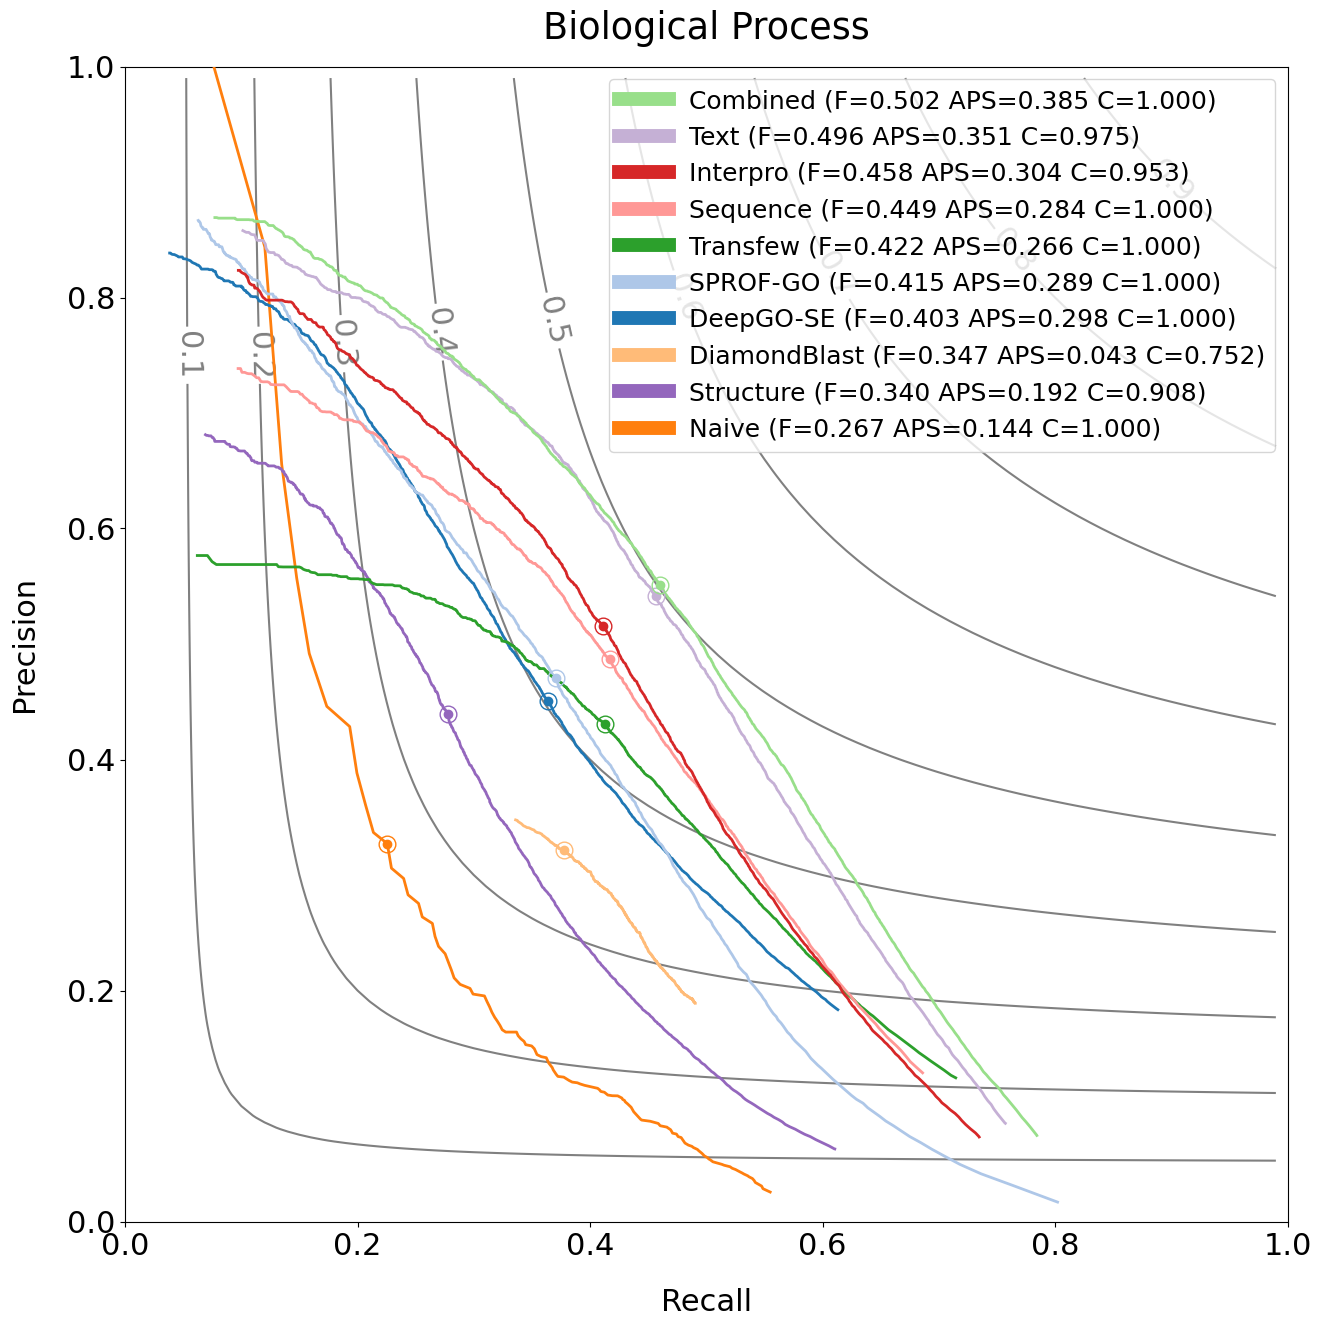

In [17]:
# Generate the figures
plt.rcParams.update({'font.size': 22, 'legend.fontsize': 18})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines. At the moment they are provided only for the F-score
    if metric.startswith('f'):
        CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
        ax.clabel(CS, inline=True) #, fontsize=10)

    # Iterate methods
    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric.startswith('f') else True, False]).iterrows()):
        data = df_methods.loc[index[:-1]]
        
        # Precision-recall or mi-ru curves
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        
        # F-max or S-min dots
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    # Set axes limit
    if metric.startswith('f'):
        plt.xlim(0, 1)
        plt.ylim(0, 1)
   
    # plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    # plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    # Set titles
    ax.set_title(ontology_dict.get(ns, ns), pad=20)
    ax.set_xlabel(axis_title_dict[cols[0]], labelpad=20)
    ax.set_ylabel(axis_title_dict[cols[1]], labelpad=20)
    
    # Legend
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg = ax.legend(markerscale=6)
    for legobj in leg.get_lines():
        legobj.set_linewidth(10.0)

    # Save figure on disk
    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight', dpi=300, transparent=True)
    # plt.clf()